## Classification of functional and non-functional software requirements using the followig algorithms:
    1. Logistic Regression
    2. Support Vector Machine
    3. Decision Tree
    4. Random Forest

#### Importing modules

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Reading the csv file and tagging the functional requirements with 1 and non-functional with 0 value

In [2]:
df = pd.read_csv("nfr.csv")
df = df.dropna(axis=1, how='any')
df["Tag"] = df.apply(lambda x: 1 if x["Type"] == "F" else 0, axis=1)
df.tail()

,Type,Requirement,Tag
551,PE,The product interface should be fast. The resp...,0
552,F,The system will use the stored e-mail addresse...,1
553,F,The system will notify affected parties for r...,1
554,F,The system will notify affected parties when ...,1
555,F,The system will notify affected parties when ...,1


In [3]:
df_ext = pd.read_csv("nfr_ext.csv")
df_ext = df_ext.dropna(axis=1, how='any')
df_ext["Tag"] = df_ext.apply(lambda x: 1 if x["Type"] == "FR" else 0, axis=1)
df_ext.tail()

,RequirementText,Type,Tag
417,There will be a designated phone number that u...,FR,1
418,Texts sent to that number will be sent to the ...,FR,1
419,"If a question is not understood by our API, th...",FR,1
420,Upon the USB being plugged in the system shall...,FR,1
421,The system shall be able to handle 1000 custom...,FR,1


#### Splitting the data into training and testing sections

In [4]:
X = df["Requirement"]
y = df["Tag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_ext = df_ext["RequirementText"]
y_ext = df_ext["Tag"]
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)

#### Creating bag-of-words from the training data set (creating a vector form of the data)

In [6]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [7]:
vectorizer = CountVectorizer()
X_train_ext_counts = vectorizer.fit_transform(X_train_ext)
X_test_ext_counts = vectorizer.transform(X_test_ext)

#### Providing frequency and weightage to the bag-of-words

In [8]:
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_test_tfidf = transformer.transform(X_test_counts)

In [9]:
transformer = TfidfTransformer()
X_train_ext_tfidf = transformer.fit_transform(X_train_ext_counts)
X_test_ext_tfidf = transformer.transform(X_test_ext_counts)

#### Grouping all models in a dictionary

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': svm.SVC(kernel="linear"),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#### Function that fits and evaluates given machine learning models and returns the scores

In [11]:
def run_algorithms(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        scores[name] = model.score(x_test, y_test)
    return scores

In [12]:
scores = run_algorithms(models, X_train_tfidf, X_test_tfidf, y_train, y_test)
scores

{'Logistic Regression': 0.8571428571428571,
 'Support Vector Machine': 0.9107142857142857,
 'Decision Tree': 0.7767857142857143,
 'Random Forest': 0.7857142857142857}

In [13]:
scores_ext = run_algorithms(models, X_train_ext_tfidf, X_test_ext_tfidf, y_train_ext, y_test_ext)
scores_ext

{'Logistic Regression': 0.8117647058823529,
 'Support Vector Machine': 0.8705882352941177,
 'Decision Tree': 0.7647058823529411,
 'Random Forest': 0.8352941176470589}

### Visualizing the accuracy of the four algorithms

In [14]:
import matplotlib.pyplot as plt

# Extract the list of algorithm names and scores
algorithms = list(scores.keys())
accuracies = list(scores.values())
accuracies_ext = list(scores_ext.values())

In [15]:
# getting the index of the algorithm with highest accuracy
max_algorithm = max(scores, key=scores.get)
max_algorithm_ext = max(scores_ext, key=scores_ext.get)
colors = ['grey' for _ in range(len(algorithms))]
max_index = algorithms.index(max_algorithm)
max_index_ext = algorithms.index(max_algorithm_ext)

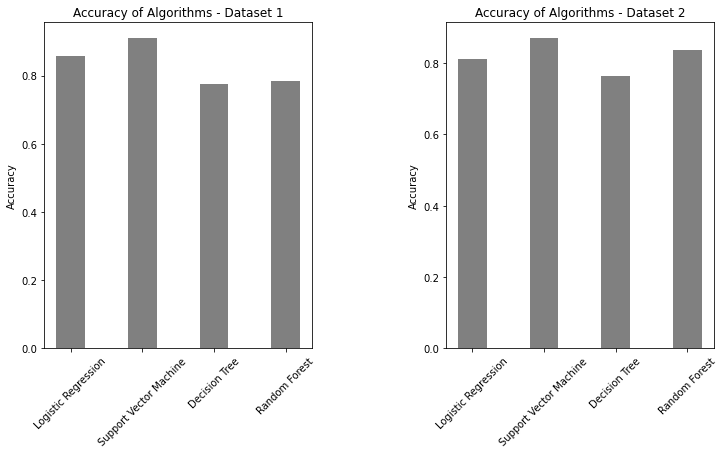

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

# Set the bar width
width = 0.4

# Plot the first bar graph on the first subplot
ax1.bar(algorithms, accuracies, width=width, color=colors)

# Set the x-axis labels for the first subplot
ax1.set_xticks(algorithms)
ax1.set_xticklabels(algorithms, rotation=45)

# Set the y-axis label for the first subplot
ax1.set_ylabel('Accuracy')

# Set the title for the first subplot
ax1.set_title('Accuracy of Algorithms - Dataset 1')

# Plot the second bar graph on the second subplot
ax2.bar(algorithms, accuracies_ext, width=width, color=colors)

# Set the x-axis labels for the second subplot
ax2.set_xticks(algorithms)
ax2.set_xticklabels(algorithms, rotation=45)

# Set the y-axis label for the second subplot
ax2.set_ylabel('Accuracy')

# Set the title for the second subplot
ax2.set_title('Accuracy of Algorithms - Dataset 2')

# Show the plot
plt.show()
